<a href="https://colab.research.google.com/github/akshay659/Ktm-data/blob/main/Ktm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [ ]:
df =pd. read_excel("ktm.xlsx")

In [ ]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [ ]:
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Phone Type'] = le.fit_transform(df['Phone Type'])
df['Current Bike'] = le.fit_transform(df['Current Bike'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Response'] = le.fit_transform(df['Response'])

In [ ]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,1,0,0,1,1,0
1,2,27,0,1,2,4,3,1
2,3,39,0,3,0,1,2,0
3,4,20,0,3,1,4,2,0
4,5,29,1,2,0,1,1,1


In [ ]:
x = df.drop('Response', axis=1)

In [ ]:
x.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship
0,1,53,1,0,0,1,1
1,2,27,0,1,2,4,3
2,3,39,0,3,0,1,2
3,4,20,0,3,1,4,2
4,5,29,1,2,0,1,1


In [ ]:
y = df[['Response']]

In [ ]:
y.head()

,Response
0,0
1,1
2,0
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=40,test_size=0.2)

In [ ]:
##  Deep learning  model building

In [ ]:
model = Sequential([Dense(25,activation='tanh',input_shape=(7,)),
                    Dense(50,activation='relu'),
                    Dense(100,activation='relu'),
                    Dense(1,activation='tanh')
                    ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                200       
                                                                 
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 6,701
Trainable params: 6,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30)

Epoch 1/30
38/38 [==============================] - 1s 9ms/step - loss: 0.2071 - mae: 0.4034 - val_loss: 0.1719 - val_mae: 0.3521
Epoch 2/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1654 - mae: 0.3469 - val_loss: 0.1643 - val_mae: 0.3381
Epoch 3/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1585 - mae: 0.3325 - val_loss: 0.1585 - val_mae: 0.3253
Epoch 4/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1567 - mae: 0.3241 - val_loss: 0.1643 - val_mae: 0.3173
Epoch 5/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1593 - mae: 0.3227 - val_loss: 0.1586 - val_mae: 0.3148
Epoch 6/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1562 - mae: 0.3182 - val_loss: 0.1586 - val_mae: 0.3108
Epoch 7/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1568 - mae: 0.3152 - val_loss: 0.1619 - val_mae: 0.3176
Epoch 8/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1550 - mae: 0.31

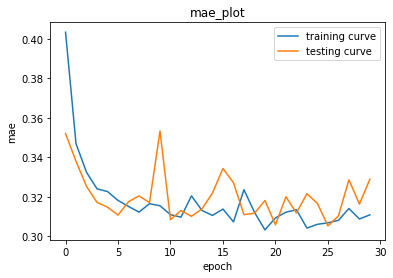

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('mae_plot')
plt.legend(['training curve', 'testing curve'])


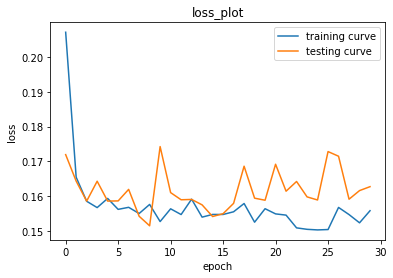

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss_plot')
plt.legend(['training curve','testing curve'])